# All results on Synthetic datasets - Binary images

Presenting results all state-of-the-art methods togehter with our APDL method

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os, sys, glob
import pandas, numpy
from skimage import io
import matplotlib.pylab as plt
from matplotlib import gridspec
import apdl.dataset_utils as tl_data

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
p_results = tl_data.update_path('results')
p_csv = os.path.join(p_results, 'experiments_synth_APD_binary_overall.csv')
print (os.path.exists(p_csv), '<-', p_csv)

DATASET = 'atomicPatternDictionary_v0'
p_data = '/mnt/F464B42264B3E590/TEMP'
print (os.path.exists(p_data), '<-', p_data)

True <- results/experiments_synth_APD_binary_overall.csv
True <- /mnt/F464B42264B3E590/TEMP


## Loading data

In [3]:
df_all = pandas.DataFrame().from_csv(p_csv, index_col=None)
print ('-> loaded DF with', len(df_all), 'items and columns:\n', df_all.columns.tolist())
d_unique = {col: len(df_all[col].unique()) for col in df_all.columns}
d_unique = {k: d_unique[k] for k in d_unique if d_unique[k] > 1}
df_all.sort('nb_labels', inplace=True)
print ('-> unique:', d_unique)

-> loaded DF with 915 items and columns:
['nb_labels', 'atlas_ARS', 'reconstruct_diff', 'time', 'folders', 'overlap_mj', 'name', 'nb_labels.1', 'nb_jobs', 'nb_runs', 'max_iter', 'path_out', 'nb_samples', 'dataset', 'method', 'ptn_split', 'computer', 'path_exp', 'gc_regul', 'path_in', 'subfiles', 'type', 'class', 'init_tp', 'gc_reinit']
-> unique: {'name': 16, 'nb_labels': 28, 'class': 5, 'dataset': 4, 'atlas_ARS': 784, 'path_exp': 65, 'time': 915, 'reconstruct_diff': 719, 'path_in': 4, 'method': 5}


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


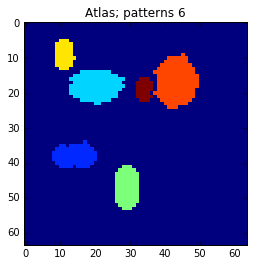

In [4]:
atlas = tl_data.dataset_compose_atlas(os.path.join(p_data, DATASET))
_ = plt.imshow(atlas, interpolation='nearest')
_ = plt.title('Atlas; patterns {}'.format(numpy.unique(atlas).shape[0] - 1))

## Dependency in number of used patterns

take out the series with various param combination

In [5]:
df_select = df_all[df_all['path_in'].str.endswith(DATASET)]
# df_select = df_select[df_select['nb_samples'] == None]
print ('number of selected', len(df_select))
df_res = pandas.DataFrame()
for v, df_gr0 in df_select.groupby('dataset'):
    for v1, df_gr1 in df_gr0.groupby('class'):
            d = {'dataset': v, 'class': v1}
            cols = ['nb_labels', 'atlas_ARS', 'reconstruct_diff', 'time']
            d.update({col: df_gr1[col].tolist() for col in cols})
            df_res = df_res.append(d, ignore_index=True)
# df_res = df_res.set_index('class')
print ('number of rows:', len(df_res), 'columns:', df_res.columns.tolist())

number of selected 240
number of rows:

 20 columns: ['atlas_ARS', 'class', 'dataset', 'nb_labels', 'reconstruct_diff', 'time']


In [8]:
def plot_results_graph(df_res, n_group, n_curve, l_graphs=('atlas_ARS', 'reconstruct_diff', 'time')):
    for v, df_group in df_res.groupby(n_group):
        clrs = plt.cm.jet(numpy.linspace(0, 1, len(df_group)))
        fig, axarr = plt.subplots(len(l_graphs), 1, figsize=(8, 6))
        fig.suptitle('{}'.format(v), fontsize=16)
        for i, col in enumerate(l_graphs):
            for j, (idx, row) in enumerate(df_group.iterrows()):
                axarr[i].plot(row['nb_labels'], row[col], label=row[n_curve], color=clrs[j])
            axarr[i].set_xlabel('nb. labels')
            axarr[i].set_ylabel(col)
            axarr[i].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            axarr[i].grid()
        # print v

## Plots by datasets

visualization per dataset (difficulty) and different param combination

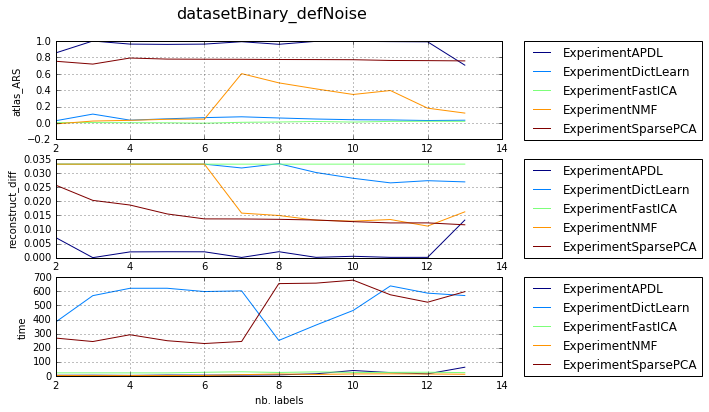

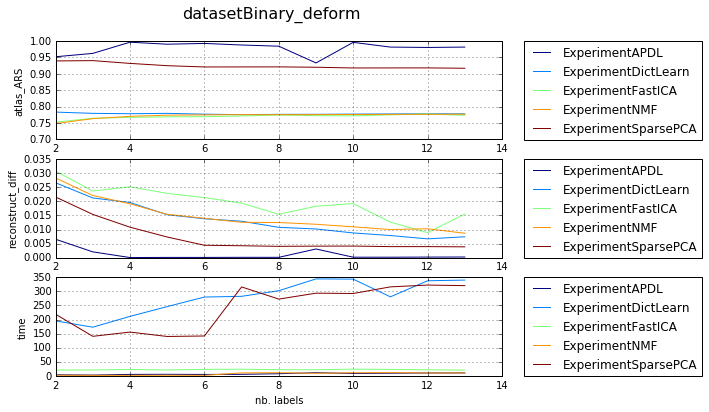

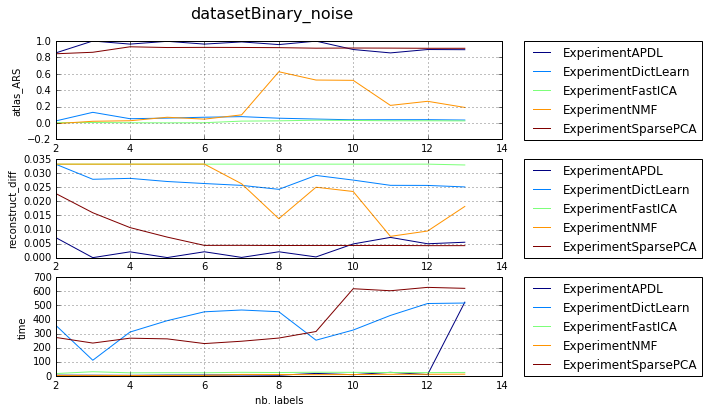

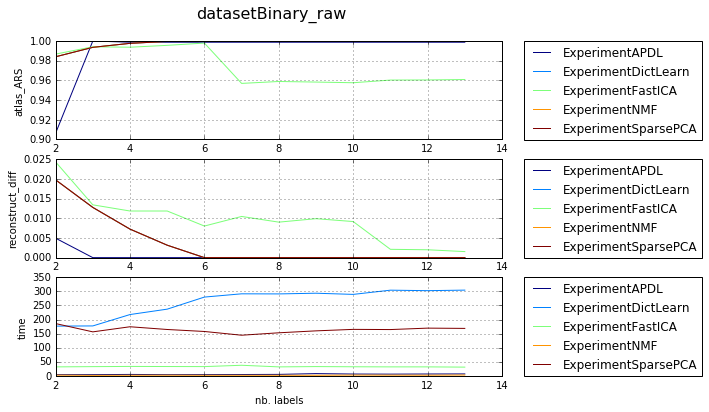

In [10]:
plot_results_graph(df_res, 'dataset', 'class')

## Plots by methods

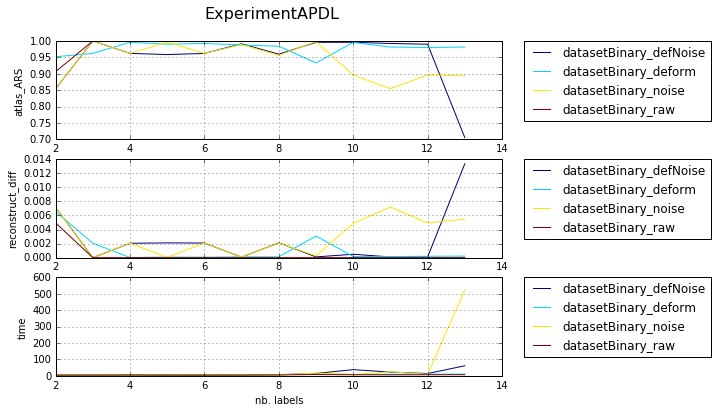

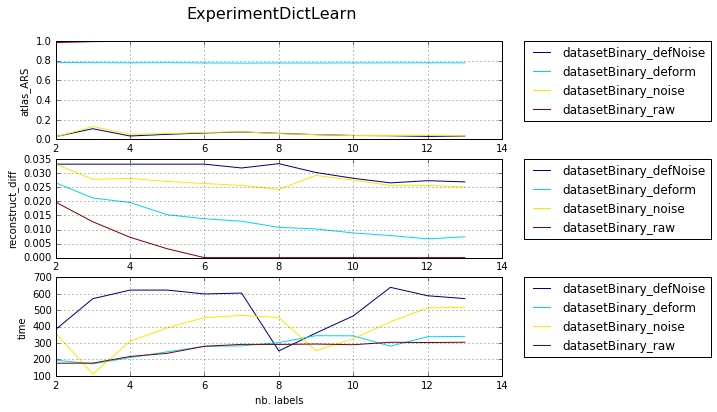

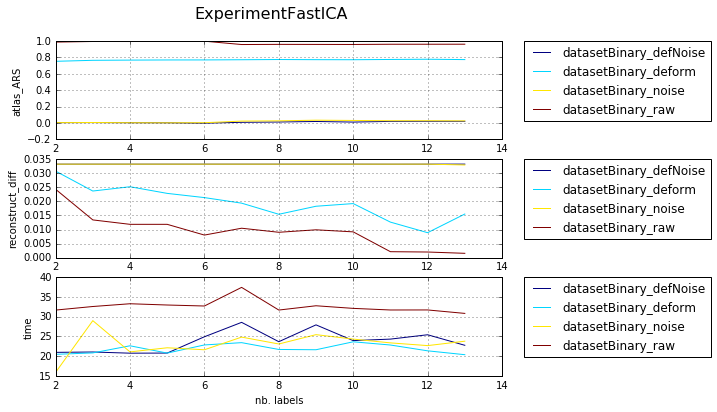

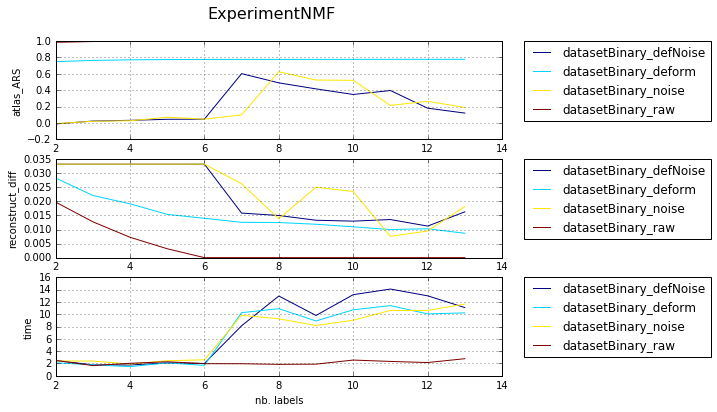

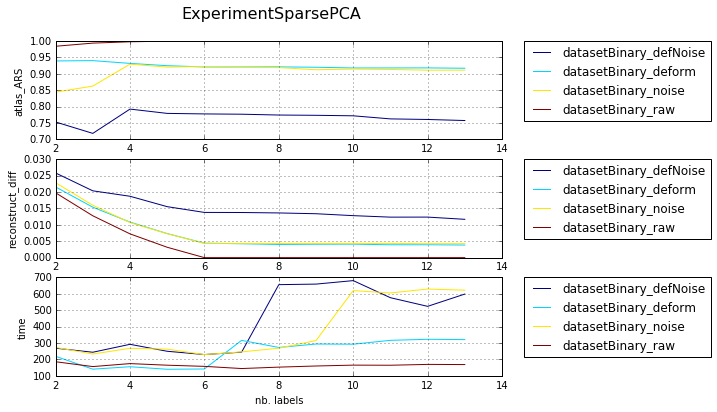

In [11]:
plot_results_graph(df_res, 'class', 'dataset')